IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Tarea 01 – Cargando y Analizando Datos

- **Fecha de Entrega:** martes 26 de agosto de 2025, a las 23:59.
- 
**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en l emódulo de Tara 01 habilitado en Canvas.




## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tara.

- Deben hacer sus consultas y comentarios sobre la Tarea a traves del canal de Tareas en eo del curso en Canvas.os.
cteriza.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Para esta tarea, tendremos como objetivo comprender cómo han cambiado los juegos de mesa en los últimos 40 años. Específicamente queremos saber qué tipos de juegos se han vuelto más comunes hoy en día y qué los caracteriza.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

## 2. Datos

Estaremos utilizando información extraída desde [BoardGameGeek.com](https://boardgamegeek.com/), una plataforma para aficionados de los juegos de mesa, que permite a sus usuarios registrar, calificar e intercambiar sus juegos favoritos. Actualmente, BGG es una de las bases de datos más extensa y diversa de juegos de mesa.

El dataset con el que trabajaremos consiste en un grupo de archivos CSV que contienen información sobre más de 100.000 juegos de mesa almacenados en la plataforma. Este puede descargarse directamente desde el siguiente enlace: https://www.kaggle.com/datasets/mshepherd/board-games Para descargar los datos, haga click en el botón de **Download**, donde podrá descargar los archivos como `.zip`, o bien utilizar la API de Kaggle.

Para el desarrollo de esta tarea, solo utilizaremos los archivos con el prefijo `bgg_`.

**Si utiliza la API de Kaggle para descargar los datos, deje el código utilizado en la siguiente celda:**

In [2]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files("mshepherd/board-games", path="C:\\Users\\isimo\\Downloads\\ciencia de datos\\imt2200-25s2\\tareas\\tarea 01", unzip=True)

Dataset URL: https://www.kaggle.com/datasets/mshepherd/board-games


### 2.1 Librerías

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y Markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 DataFrame unificado (1 punto)

Vamos a cargar en un DataFrame los datos de juegos guardados en el documento `bgg_GameItem.csv`. Al inspeccionar nuestros datos, podemos notar que los valores de ciertas comunas vienen "codificados" con ID. Para comenzar, vamos a juntar la información de los distintos archivos descargados.

**a) (0.8 pts)** Genere un DataFrame único con toda la información de cada juego, incluyendo: nombres de artistas y diseñadores involucrados, mecánicas, categorías, tipo, familia y editorial. Guarde este DataFrame en un nuevo archivo CSV.

In [4]:
gameitem = pd.read_csv("bgg_GameItem.csv")

#Se leen los archivos que contienen lo necesario para la decodificacion
artista_disenador = pd.read_csv("bgg_Person.csv")
mecanicas = pd.read_csv("bgg_Mechanic.csv")
categorias = pd.read_csv("bgg_Category.csv")
tipo_juego = pd.read_csv("bgg_GameType.csv")
familia_juego = pd.read_csv("bgg_GameFamily.csv")
editorial_juego = pd.read_csv("bgg_Publisher.csv")

#La siguiente funcion se hizo para agilizar el proceso de la decodificacion de la base de datos,
# para evitar errores por distintos tipos de datos (int64, str), se leen las columnas como un solo 
# tipo de dato (str) con el comando .astype. Se hace un cruce y reemplazamiento de las bases de 
# datos de codificacion con las del dataframe principal, para esto se utilizara el metodo merge(),
# luego se intercambiara la informacion de las columnas "agregadas" con las columnas principales,
# para finalmente borrar las columnas agregadas al final (bgg_id y name_suffix)
#Para evitar el error al borrar la columna nombre, se utiliza en cada caso un sufijo (suffix) 
def decodificador(main, ref, columna_main, columna_id="bgg_id", columna_nom="name"):
    main[columna_main] = main[columna_main].astype(str)
    ref[columna_id] = ref[columna_id].astype(str)
    columnas_orginales = set(main.columns)
    dataframe = main.merge(ref, left_on=columna_main, right_on=columna_id, how="left", 
                           suffixes=("", f"_{columna_main}"))
    dataframe[columna_main] = dataframe[columna_nom]
    #Consulta a la IA ChatGPT: "Estoy creando una funcion en python con Pandas para reemplazar/decodificar
    # una columna de un dataframe principal (main) con los valores de otro dataframe (ref). Estoy 
    # utilizando merge(). Copiare la funcion hasta el momento a continuacion, aun asi la explico: ya 
    # logro reemplazar los valores, pero quiero que la funcion elimine automaticamente todas las 
    # columnas extras generadas (nombres con suffix, y los _id), logrando asi que el dataframe final 
    # solo conserve la columna original decodificada y el resto de columnas originales. ¿Como puedo 
    # escribir la funcion para evitar las columnas extras innecesarias?" La respuesta de ChatGPT 
    # incluye columnas_originales, y lo que sigue abajo en este codigo (exceptuando el return):
    columnas_a_eliminar = [columna_id, columna_nom, f"{columna_id}_{columna_main}", 
                           f"{columna_nom}_{columna_main}"]
    columnas_a_eliminar = [c for c in columnas_a_eliminar if c in dataframe.columns]
    dataframe.drop(columns=columnas_a_eliminar, inplace=True)
    return dataframe

#Se llama a la funcion para cada archivo codificado .csv
gameitem = decodificador(gameitem, artista_disenador, "designer")
gameitem = decodificador(gameitem, artista_disenador, "artist")
gameitem = decodificador(gameitem, mecanicas, "mechanic")
gameitem = decodificador(gameitem, categorias, "category")
gameitem = decodificador(gameitem, tipo_juego, "game_type")
gameitem = decodificador(gameitem, familia_juego, "family")
gameitem = decodificador(gameitem, editorial_juego, "publisher")

#Este nuevo archivo decodificado se guarda en un nuevo archivo .csv
columnas_decodificadas = ["game_type", "mechanic", "artist", "designer", "family", "publisher", "category"]
archivo = gameitem[columnas_decodificadas]
archivo.to_csv("data_frame_decodificado.csv", index=False)

#Se muestran los primeros 5 items para una mejor visualizacion 
df = pd.read_csv("data_frame_decodificado.csv")
df.head(5)

,game_type,mechanic,artist,designer,family,publisher,category
0,Strategy Game,NaN,NaN,Die Macher,NaN,NaN,NaN
1,Strategy Game,Trick-taking,Bob Pepper,Dragonmaster,NaN,NaN,NaN
2,Strategy Game,NaN,Franz Vohwinkel,Samurai,NaN,NaN,NaN
3,Strategy Game,NaN,Thomas di Paolo,Tal der Könige,NaN,KOSMOS,Ancient
4,Strategy Game,NaN,NaN,Acquire,NaN,NaN,NaN


**b) (0.2 pts)** ¿Cuánto espacio en disco ocupa este DataFrame? ¿Cuánto espacio en disco ocupan los documentos CSV separados? ¿A qué se debe esta diferencia? Comente.



*El dataframe data_frame_decodificado ocupa 6.855KB. Luego, los archivos .csv separados ocupan,*

*- GameItem: 15.701KB*
*- Category: 2KB*
*- GameFamily: 166KB*
*- GameType: 1KB*
*- Mechanic: 5KB*
*- Person: 1.135KB*
*- Publisher: 583KB*

*Esto ocurre porque, en el caso de GameItem, esta base de datos contenía toda la información unificada, incluso con la codificación. En cambio, los otros archivos .csv solo contenían la decodificación efectiva para algunas de las columnas de bbg_GameItem.csv. Podemos notar, si entramos a los archivos, que mientras menos contenido tienen, menos KB ocupan. Esto ocurre porque se tiene una relación directa de más datos -> más espacio ocupado en el disco duro. Por esta razón, mi archivo creado data_frame_decodificado.csv ocupa más espacio que los archivos decodificadores, pero menos espacio que bbg_GameItem.csv, puesto que solo utilicé las siete columnas decodificadas de interés para su creación, en vez de las totales de GameItem.*

### 3.2 Juegos publicados anualmente (1.5 puntos)


**a) (0.5 pts)** Limpie los datos para dejar solo aquellos que tienen valores válidos de año de publicación. Luego responda: ¿cuál es el rango de años con el que estamos trabajando? ¿Tienen sentido estos años?


In [5]:
#Para limpiar los datos, se concretaran dos pasos:
# 1. Se eliminarán todas las filas sin ningún dato en la columna "year".
# 2. Se filtrarán los datos en el rango [-3600, 2025](*1)

gameitem = pd.read_csv("bgg_GameItem.csv")

gameitem = gameitem[gameitem["year"].notnull()]
gameitem = gameitem[gameitem["year"] >= -3500.0]
gameitem = gameitem[gameitem["year"] <= 2025.0]

#A pesar de que el ejercicio no lo pide, se decide crear un archivo para ver que todo este correcto:
gameitem.to_csv("years_validos.csv", index=False)
#De forma interna, al ver que el archivo creado pesa 16.749KB en contraste a los 18.295KB de GameItem, queda
# claro que hubo una limpieza de algunos datos inválidos.

#Para el rango, utilizamos numpy con su funcion Peak to peak
year_variable = gameitem["year"].to_numpy()
rango = np.ptp(year_variable)
print(int(rango))

#(*1)Para esta parte, se­ buscó de hace cuánto datan los juegos de mesa más antiguos, para eliminar 
# cualquier dato erróneo de la base de datos que date de antes sin ninguna prueba. Además, el rango no
# pasa de 2025, puesto que es el año actual. A pesar del debate académico detrás, se decide tomar
# a Senet como el juego más antiguo que data de ~3500a.C. (las fechas varían en las publicaciones por
# debates arqueológicos, sin embargo se decide tomar la fuente más antigua puesto que la otra opción aceptada, 
# The Royal Game of Ur, es un juego más actual que Senet, pero data del ~3500a.C. - ~3100a.C. también
# [dependiendo la fuente]). Por esta razón se decide acotar en este rango.
# Fuentes:
# https://www.britishmuseum.org/blog/top-10-historical-board-games
# https://en.wikipedia.org/wiki/Senet
# Crist, Walter. "Debunking the Diffusion of Senet." Board Game Studies Journal, 2021.

5525


*El rango de los años trabajados es 5525. La pregunta de si tiene sentido depende mucho de como se tome; tiene sentido porque, habiendo buscado los datos históricos, efectivamente el primer juego de mesa (descubierto hasta ahora) de la historia es Senet, que data de ~5000 años, donde se creó el primer juego de mesa, y en el código nos aseguramos que no pasara del año actual 2025.*

*Ahora, si abordamos la pregunta consultando, "¿para qué tienen sentido los años?", cambia, pues dependería netamente de lo que se quiere responder el si tienen sentido, o si se debería acortar el rango en ciertos años. En resumen, dentro del contexto histórico, sí, tanto los datos como el rango tienen lógica.*

**b) (0.5 pts)** Seleccione solamente los juegos entre los años 1980 y 2025. Luego grafique la cantidad de juegos publicados por año. ¿Cómo es esta tendencia? Comente.

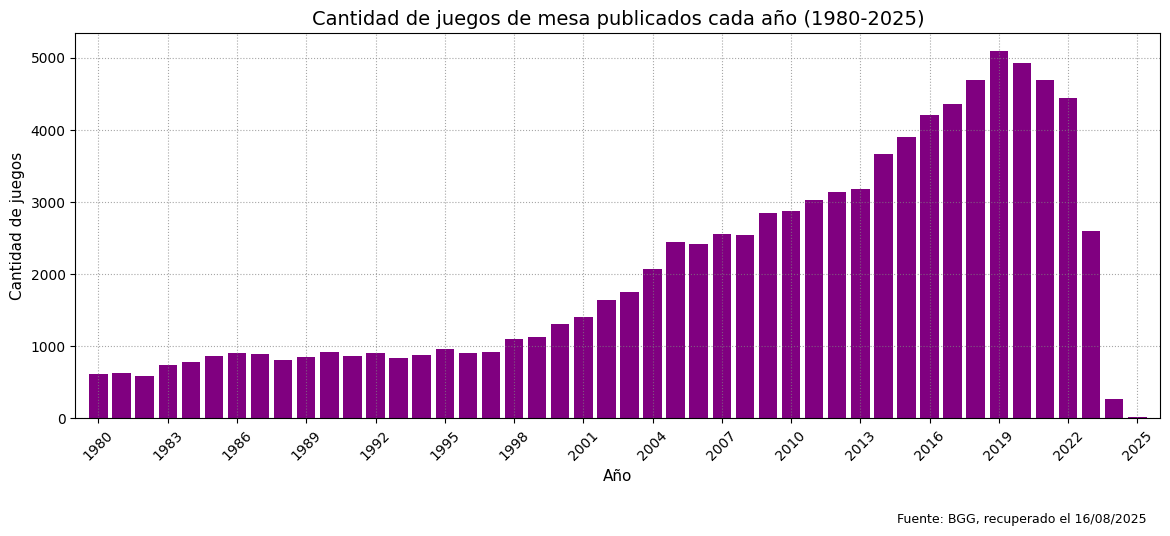

In [106]:
#Primero, se recorta el rango al pedido. Luego, se agrupan los juegos por año con la
# función groupby() y se cuenta la cantidad de juegos publicados por año. Los datos 
# se ordenan cronologicamente, así finalmente se crea el gráfico con matplotlib.
#El grafico toma como referencia algunos recursos vistos en la actividad 1.
juegos_en_rango = pd.read_csv("years_validos.csv")

juegos_en_rango = juegos_en_rango[juegos_en_rango["year"] >= 1980.0]
juegos_en_rango = juegos_en_rango[juegos_en_rango["year"] <= 2025.0]

juegos_cantidad = juegos_en_rango.groupby("year")
juegos_por_year = juegos_cantidad["year"].count()
juegos_por_year = juegos_por_year.sort_index()

plt.figure(figsize=(14,5))
plt.bar(juegos_por_year.index, juegos_por_year.values, color="purple")
plt.title("Cantidad de juegos de mesa publicados cada año (1980-2025)", fontsize=14, color="k")
plt.xlabel("Año", fontsize=11)
plt.ylabel("Cantidad de juegos", fontsize=11)
plt.xticks(juegos_por_year.index[::3], rotation=45)
plt.xlim(1979, 2026)
plt.grid(True, linestyle=":", color="gray", alpha=0.7)
plt.figtext(0.89, -0.1,
            "Fuente: BGG, recuperado el 16/08/2025",
            wrap=True, horizontalalignment="right", fontsize=9)
plt.show()

*La tendencia, entre 1800 y los 2000, parecía ser estable, no sobrepasando en cantidad los 1000 publicados por año. En el 2000, comienza a subir gradualmente hasta alcanzar su máximo en 2019, para luego bajar progresivamente hasta el año 2023, y tener una caída considerable en 2024 (~2500 en 2023, a menos de 500 en 2024). Esto, sin embargo, puede deberse a que, al ser juegos más actuales, aún no los suben a la base de datos; sin embargo, para una respuesta concreta, habría que hacer un análisis más profundo tomando en consideración la cultura, la economía, y otros factores que puedan afectar la publicación de juegos.*

**c) (0.5 pts)** ¿Entre qué años hubo un mayor aumento de publicación de juegos de mesa según los registros de BGG?

In [ ]:
#Se toma nuevamente el archivo de years_validos para esta pregunta
datos_considerados = pd.read_csv("years_validos.csv")

#Igual que en la sección b), se agrupan, cuentan y ordenan los datos por años
# para poder trabajarlos más fácil.
recorte_info = datos_considerados.groupby("year")
recorte_info = recorte_info["year"].count()
recorte_info = recorte_info.sort_index()

#Con un flujo de iteración sencilla se busca encontrar el máximo "salto" en 
# publicación durante los años, utilizando .iloc y .index para acceder a la cant.
# de publicación y los años respectivamente.
maximo = 0
inicio = None
ultimo = None

for i in range(1, len(recorte_info)):
    actual = recorte_info.iloc[i]
    anterior = recorte_info.iloc[i-1]
    aumento = actual - anterior
    if aumento > maximo:
        maximo = aumento
        inicio = recorte_info.index[i-1]
        ultimo = recorte_info.index[i]

#Finalmente, se imprime el resultado.
print(f"Entre los años {int(inicio)} y {int(ultimo)} estuvo el mayor aumento de publicación de juegos de mesa, con un total de {maximo}.")

Entre los años 2013 y 2014 estuvo el mayor aumento de publicación de juegos de mesa, con un total de 484.


### 3.3 Análisis de duración y complejidad (1.5 puntos)

Si bien hay muchas posibles características que podemos explorar para los juegos de mesa, esta vez nos centraremos en el tiempo de juego y la complejidad. En esta sección queremos comprender si se ha modificado notablemente la duración promedio y la percepción de complejidad de los juegos de mesa a través de los años.

**a) (0.3 pts)** Inspecciones y filtre los datos que tengan valores válidos para: tiempo mínimo de juego, tiempo máximo de juego y complejidad. En el caso de que existan "outliers", puede descartarlos, cosiderando un rango razonable para las variables anteriores. Justifique su desición.

In [8]:
#Se seguirá la misma lógica que en 3.2 a), exceptuando el rango a considerar.
gameitem = pd.read_csv("bgg_GameItem.csv")

def valido(archivo, variable):
    return archivo[archivo[variable].notnull()]

gameitem = valido(gameitem, "min_time")
gameitem = valido(gameitem, "max_time")
gameitem = valido(gameitem, "complexity")

#Para complexity, se asegura el rango [1, 5]
gameitem = gameitem[gameitem["complexity"] <= 5.0]
gameitem = gameitem[gameitem["complexity"] >= 1.0]

#Implementación estadística a cuartiles para ver cómo están los datos
print(gameitem[["min_time", "max_time", "complexity"]].describe())

#Filtrar min_time y max_time según:
# Para no sesgar solo por el conocimiento cultural propio, se hizo la siguiente pregunta a la IA DeepSeek:
# "Dada una tabla de juegos de mesa con columnas de números que representan el tiempo mínimo y máximo 
# del tablero, ¿hay algún módulo en pandas que me ayude a saber cuáles son los outliers y no 
# dejar fuera información crucial debido a sesgos personales?"

#Su respuesta llevó a la siguiente implementación estadística:

Q1_min = gameitem["min_time"].quantile(0.25)
Q3_min = gameitem["min_time"].quantile(0.75)
IQR_min = Q3_min - Q1_min
lim_inf_min = Q1_min - 1.5 * IQR_min
#-40.0
lim_sup_min = Q3_min + 1.5 * IQR_min
#120
Q1_max = gameitem["max_time"].quantile(0.25)
Q3_max = gameitem["max_time"].quantile(0.75)
IQR_max = Q3_max - Q1_max
lim_inf_max = Q1_max - 1.5 * IQR_max
#-85.0
lim_sup_max = Q3_max + 1.5 * IQR_max
#195. Los juegos de rol pueden durar hasta días, así que para no realizar una decisión
#arbitraria, se opta por:
lim_sup_max = gameitem["max_time"].quantile(0.99)
#480

#Nos guiamos con estos datos, pero con consideraciones:
# - Descartar tiempos negativos por absurdo en min_time
# - Descartar cuando max_time < min_time, por absurdo
# - Lim_inf_max quedará en 5 minutos, pues -85.0 es absurdo

gameitem = gameitem[gameitem["max_time"] >= gameitem["min_time"]]
gameitem = gameitem[gameitem["min_time"] > 0.0]
gameitem = gameitem[gameitem["min_time"] <= lim_sup_min]
gameitem = gameitem[gameitem["max_time"] >= 5.0]
gameitem = gameitem[gameitem["max_time"] <= lim_sup_max]

#Implementación estadística a cuartiles para ver que los datos estén mejor distribuidos
print(gameitem[["min_time", "max_time", "complexity"]].describe())

#Nuevo archivo .csv para su implementación en b) y d).
gameitem.to_csv("tiempos_dificultad.csv", index=False)


           min_time      max_time    complexity
count  43454.000000  43454.000000  43454.000000
mean      58.699291     87.706218      1.904462
std      433.832809    733.971386      0.823448
min        1.000000      1.000000      1.000000
25%       20.000000     20.000000      1.000000
50%       30.000000     45.000000      1.972950
75%       60.000000     90.000000      2.408875
max    60120.000000  84000.000000      5.000000
           min_time      max_time    complexity
count  40224.000000  40224.000000  40224.000000
mean      39.333110     53.190707      1.823584
std       29.584342     48.076144      0.765889
min        1.000000      5.000000      1.000000
25%       20.000000     20.000000      1.000000
50%       30.000000     40.000000      1.785700
75%       60.000000     60.000000      2.250000
max      120.000000    480.000000      5.000000


**b) (0.2 pts)** Veremos ahora si ha cambiado la duración promedio de los juegos de mesa en nuestro rango de años seleccionado. Primero, cree una nueva columna `avg_time` en el dataset con la duración promedio supuesta para cada juego.

In [9]:
gameitem = pd.read_csv("tiempos_dificultad.csv")

gameitem["avg_time"] = (gameitem["max_time"] + gameitem["min_time"]) / 2

gameitem = gameitem.to_csv("columna_extra.csv")


**c) (0.5 pts)** Grafique la duración promedio de juegos al año entre 1980 y 2025. ¿Existe alguna tendencia? Asegúrese de colocar las unidades correspondientes en sus ejes si es necesario. Comente sus resultados.

Duración aproximada promedio de juegos: 50.16 minutos.


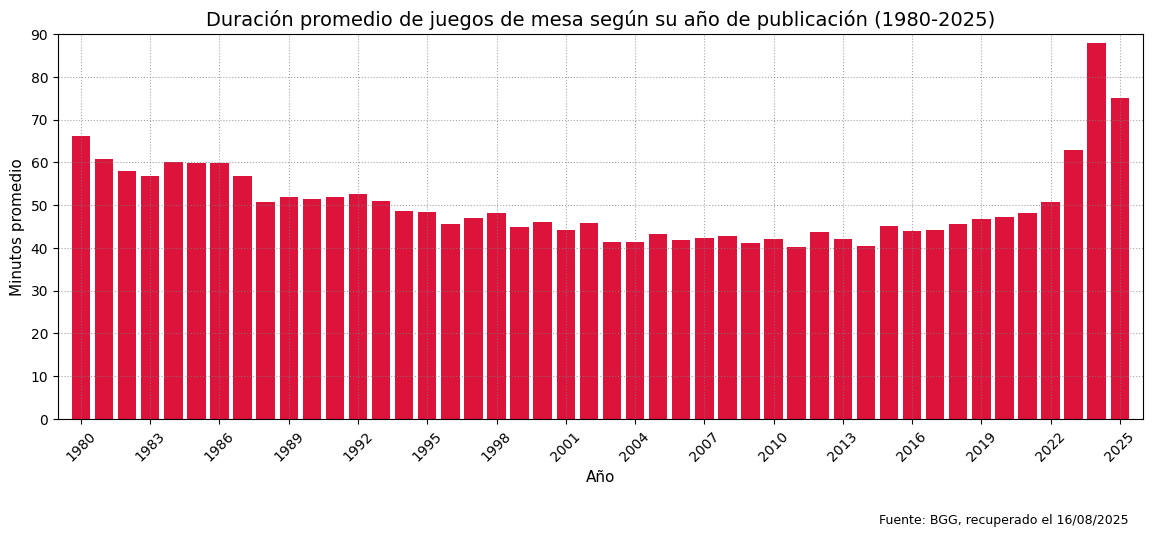

In [108]:
#Se utilizará el mismo método que en 3.2 b)
gameitem = pd.read_csv("columna_extra.csv")
gameitem = gameitem[gameitem["year"] >= 1980.0]
gameitem = gameitem[gameitem["year"] <= 2025.0]

gameitem = gameitem.groupby("year")
gameitem = gameitem["avg_time"].mean()
gameitem = gameitem.sort_index()
suma_prom = sum(gameitem.values) / len(gameitem.values)

plt.figure(figsize=(14,5))
plt.bar(gameitem.index, gameitem.values, color="crimson")
plt.title("Duración promedio de juegos de mesa según su año de publicación (1980-2025)", fontsize=14, color="k")
plt.xlabel("Año", fontsize=11)
plt.ylabel("Minutos promedio", fontsize=11)
plt.xticks(gameitem.index[::3], rotation=45)
plt.ylim(0, 90)
plt.xlim(1979, 2026)
plt.grid(True, linestyle=":", color="gray", alpha=0.7)
plt.figtext(0.89, -0.1,
            "Fuente: BGG, recuperado el 16/08/2025",
            wrap=True, horizontalalignment="right", fontsize=9)

#La duración promedio de este periodo es
print(f"Duración aproximada promedio de juegos: {round(suma_prom, 2)} minutos.")

plt.show()


_El gráfico muestra que, desde 1980 (tiempo promedio ~75min), venía bajando gradualmente hasta 1983, donde los minutos tuvieron un alza de no más de 5 minutos (tiempo promedio 60min), y se estabilizaron hasta 1986. Luego fueron bajando gradualmente, incluso con aumentos pequeños cada ciertos años. Y desde 1994 hasta 2021, el tiempo promedio de juego disminuyó al rango mínimo que visualizamos, oscilando entre 40-50 minutos, con mínimos muy cercanos a 40 mins en 2011 y 2014. Sin embargo, en 2023 hubo un aumento atípico (+10 mins, ~63min tiempo promedio), seguido de un pico en 2024 (~87 mins) y una ligera bajada en 2025 (~75 mins)._

_El promedio histórico es ~50.16 mins, pero los datos recientes indican una posible ruptura de la tendencia a la baja, quizá por una nueva estrategia de las compañías de juegos de mesa o un cambio en las preferencias post-pandemia. Sin embargo, el porqué el alza sorpresiva de los minutos promedios de juego no sería más que una vaga suposición, porque de querer sacar una conclusión segura, se necesitaría una investigación más exhaustiva, cautelosa, y más análisis, ya que 2-3 años no bastan para confirmar un cambio en la tendencia, y se debe tener cuidado al sacar conclusiones con el salto atípico en el período 2022-2024. Falta analizar más años._

**d) (0.5 pts)** Nos interesa saber si los juegos de mesa recientes son más complejos que aquellos publicados antes de los 2000. BoardGameGeek permite evaluar la complejidad (o "weight") de un juego en una escala de 1 a 5, siendo 1 un juego "liviano" o fácil de entender, y 5 un juego "pesado" o complejo. Primero, seleccione los juegos que han sido evaluados por al menos 100 usuarios. Luego grafique la complejidad promedio de los juegos según año. Responda: ¿ha cambiado la percepción de complejidad entre juegos entre 1980 y la actualidad?

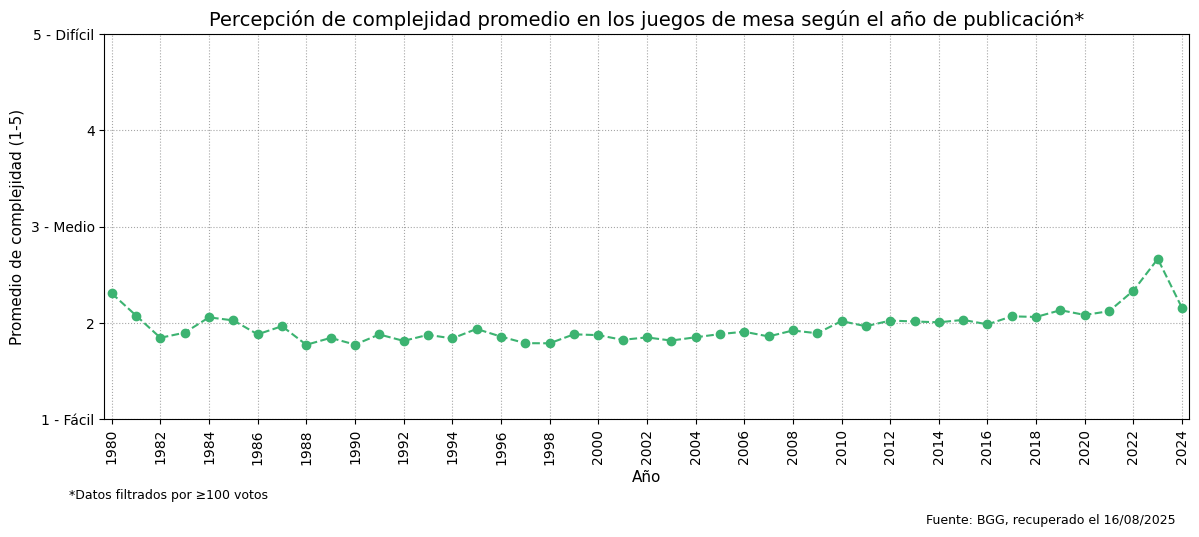

,Período,Promedio complejidad (1-5)
0,1980-1999,1.903997
1,2000-2024,2.012204
2,1980-2024,1.964112


In [ ]:
#Se toma el archivo creado en la sección a), que ya tiene filtrado los absurdos,
# incluidos los de complejidad
gameitem = pd.read_csv("tiempos_dificultad.csv")

gameitem = gameitem[gameitem["num_votes"] >= 100]
gameitem = gameitem[(gameitem["year"] <= 2025) & (gameitem["year"] >= 1980)]

#Primero, se hará un gráfico de lineas para poder visualizar mejor el cambio en 
# la complejidad a través de los años, desde 1980-2025 (no existen datos válidos en 2025
# por el momento). Para una lectura más comprensible y fluida, se decidió añadir a la
# puntuación 1-5 dificultad en palabras para que sea más sencillo de entender sin 
# información previa del gráfico (fácil, medio, difícil).
gameitem = gameitem.groupby("year")
gameitem = gameitem["complexity"].mean()
gameitem = gameitem.sort_index()

plt.figure(figsize=(14,5))
gameitem.plot.line(color="mediumseagreen", linestyle="--", marker="o")
plt.title("Percepción de complejidad promedio en los juegos de mesa según el año de publicación*", 
          fontsize=14)
plt.xlabel("Año", fontsize=11)
plt.ylabel("Promedio de complejidad (1-5)", fontsize=11)
plt.xticks(gameitem.index[::2], rotation=90)
plt.grid(True, linestyle=":", color="gray", alpha=0.7)
plt.ylim(1, 5) 
plt.xlim(1979.7, 2024.3)
plt.yticks([1, 2, 3, 4, 5], ["1 - Fácil", "2", "3 - Medio", "4", "5 - Difícil"])
plt.figtext(0.1, -0.05,
            "*Datos filtrados por ≥100 votos",
            wrap=True, horizontalalignment="left", fontsize=9)
plt.figtext(0.89, -0.1,
            "Fuente: BGG, recuperado el 16/08/2025",
            wrap=True, horizontalalignment="right", fontsize=9)
plt.show()

#Luego, se toman ambos rangos que se desean estudiar según la pregunta, para 
# analizar el promedio de ambos periodos. Para esto, no se realizará un gráfico,
# se verá interpretado en una tabla simple
antes_2000 = gameitem[(gameitem.index >= 1980.0) & (gameitem.index < 2000.0)]
despues_2000 = gameitem[(gameitem.index <= 2025.0) & (gameitem.index >= 2000.0)]

prom_antes = antes_2000.mean()
prom_despues = despues_2000.mean()
prom_act = gameitem.mean()
tabla = pd.DataFrame()
tabla["Período"] = ["1980-1999", "2000-2024", "1980-2024"] 
tabla["Promedio complejidad (1-5)"] = [prom_antes, prom_despues, prom_act]

tabla.head()

_Sí, ha cambiado la percepción de complejidad, pero es más notorio entre los años 2022-2023, donde el promedio subió de forma significativa a lo que venía siendo el período anterior de más de 20 años. En 1980, el valor se asemejaba al de 2022; entre este período (1980-2022) la complejidad promedio fue estable alrededor de (2.0). En 2023 alcanza su punto máximo, ~2.7, pero luego en 2024 vuelve la complejidad a acercarse al promedio de su período 2000-2024 (~2.0), y también al promedio de del período 1980-2024 en conjunto (~1.7)._ 

### 3.4 Análisis de categorías comunes (2 puntos)

Existe una gran diversidad de categorías de juegos de mesa. Ahora nos concentraremos en un grupo específico de ellas, con el fin de analizar cómo a cambiado la cantidad de juegos de estas clases desde 1980 hasta hoy.

**a) (0.7 pts)** ¿Cuáles son las 5 categorías más comunes en los juegos del dataset? Muestre la cantidad de juegos que hay de cada una. Puede graficar estos valores, o bien, entregar un DataFrame con sus valores.

In [107]:
#Se utilizará la técnica de la pregunta 3.1 a) para decodificar la categoría,
# se limpiarán los datos nulos, se acortatá el rango de años, se ordenarán 
# por categoría, se sumarán, se ordenarán de mayor a menor y luego se cortará 
# la base de datos con los 5 primeros, para crear un dataframe con estos datos 
# obtenidos. Se decide concetrarse solo en las categorías sin eliminar por "absurdo" 
# otras categorías vistas en 3.1, 3.2 y 3.3.

gameitem = pd.read_csv("bgg_GameItem.csv")
categorias = pd.read_csv("bgg_Category.csv")

gameitem = gameitem[(gameitem["year"] <= 2025) & (gameitem["year"] >= 1980)]

def decodificador(main, ref, columna_main, columna_id="bgg_id", columna_nom="name"):
    main[columna_main] = main[columna_main].astype(str)
    ref[columna_id] = ref[columna_id].astype(str)
    columnas_orginales = set(main.columns)
    dataframe = main.merge(ref, left_on=columna_main, right_on=columna_id, how="left", 
                           suffixes=("", f"_{columna_main}"))
    dataframe[columna_main] = dataframe[columna_nom]
    columnas_a_eliminar = [columna_id, columna_nom, f"{columna_id}_{columna_main}", 
                           f"{columna_nom}_{columna_main}"]
    columnas_a_eliminar = [c for c in columnas_a_eliminar if c in dataframe.columns]
    dataframe.drop(columns=columnas_a_eliminar, inplace=True)
    return dataframe

gameitem = decodificador(gameitem, categorias, "category")
gameitem = gameitem[gameitem["category"].notnull()]
gameitem = gameitem.groupby("category")
gameitem = gameitem["category"].count()
gameitem = gameitem.sort_values(ascending=False)
gameitem = gameitem[:5]

#Guardar la serie para usarla en b)
gameitem.to_csv("Top5_categorías.csv")

tabla = pd.DataFrame()
tabla["Categoría"] = gameitem.index
tabla["Cantidad"] = gameitem.values
tabla.head()

,Categoría,Cantidad
0,Arena,9
1,Chameleon,8
2,Grand Prix,8
3,Robin Hood,7
4,Mafia,6


**b) (0.3 pts)** Para cada una de estas 5 categorías, cree un DataFrame que contenga la cantidad de juegos en el dataset según año. Luego junte estos DataFrames en uno solo con los atributos de "Año", "Categoría" y "Cantidad".

In [142]:
#Se vuelve a leer los archivos, incluyendo la serie creada en a), la idea es ir iterando
# cada categoría del top5 en las categorías de gameitem, para así guardar en una lista los
# datos que sirven, para luego agregarlos a un dataframe. Cruzar la información de los dataframes
# de categoría y años, para poder sumar las recurrencias según categoría anualmente, y
# finalmente concatenar los dataframes para mostrar las tres columnas al mismo tiempo (y ordenar por año)
gameitem = pd.read_csv("bgg_GameItem.csv")
categorias = pd.read_csv("bgg_Category.csv")
top_5 = pd.read_csv("Top5_categorías.csv")

gameitem = gameitem[(gameitem["year"] <= 2025) & (gameitem["year"] >= 1980)]

def decodificador(main, ref, columna_main, columna_id="bgg_id", columna_nom="name"):
    main[columna_main] = main[columna_main].astype(str)
    ref[columna_id] = ref[columna_id].astype(str)
    columnas_orginales = set(main.columns)
    dataframe = main.merge(ref, left_on=columna_main, right_on=columna_id, how="left", 
                           suffixes=("", f"_{columna_main}"))
    dataframe[columna_main] = dataframe[columna_nom]
    columnas_a_eliminar = [columna_id, columna_nom, f"{columna_id}_{columna_main}", 
                           f"{columna_nom}_{columna_main}"]
    columnas_a_eliminar = [c for c in columnas_a_eliminar if c in dataframe.columns]
    dataframe.drop(columns=columnas_a_eliminar, inplace=True)
    return dataframe

gameitem = decodificador(gameitem, categorias, "category")

años_y_categ = []

for cat in top_5["category"]:
    cate = gameitem[gameitem["category"] == cat]
    #Consulta a la IA ChatGPT: "Estoy intentando crear dos dataframes distintos para
    # luego juntarlos un uno solo, sin embargo no sé cómo clasificar y contar la categoría
    # por años, todas las estrategias me salen con KeyError. Adjunto el código actual, explícame
    # los errores, o si mi enfoque debería variar. Las fechas no deben duplicarse con la misma categoría
    # pero si en un año hay más de una categoría, debe mostrarse". A continuación la solución propuesta 
    # por ChatGPT:
    conteo = cate.groupby("year").size().reset_index(name="Cantidad")
    conteo["Categoría"] = cat
    años_y_categ.append(conteo)

data_frame_parcial = pd.concat(años_y_categ).reset_index(drop=True)
data_frame_parcial = data_frame_parcial.rename(columns={"year": "Año"})
data_frame_parcial = data_frame_parcial.sort_values("Año").reset_index(drop=True)

#Guardar archivo para usarlo en c)
data_frame_parcial.to_csv("Ultimos_datos_tabla.csv")

#Dataframe en orden ascendente de años
data_frame_parcial

,Año,Cantidad,Categoría
0,1981.0,1,Mafia
1,1982.0,1,Mafia
2,1983.0,1,Grand Prix
3,1984.0,1,Arena
4,1984.0,1,Grand Prix
5,1985.0,1,Grand Prix
6,1988.0,1,Chameleon
7,1990.0,1,Robin Hood
8,1991.0,1,Robin Hood
9,1994.0,1,Robin Hood


**c) (1 pto)** Grafique, en un solo gráfico y con distintos colores, la cantidad de juegos por año según categoría. Preocúpese de ponerle etiquetas al gráfico para identificar cada categoría y una leyenda donde se muestre cada una. Comente: ¿ha habido un cambio entre los juegos más comunes en los años 80 y hoy?


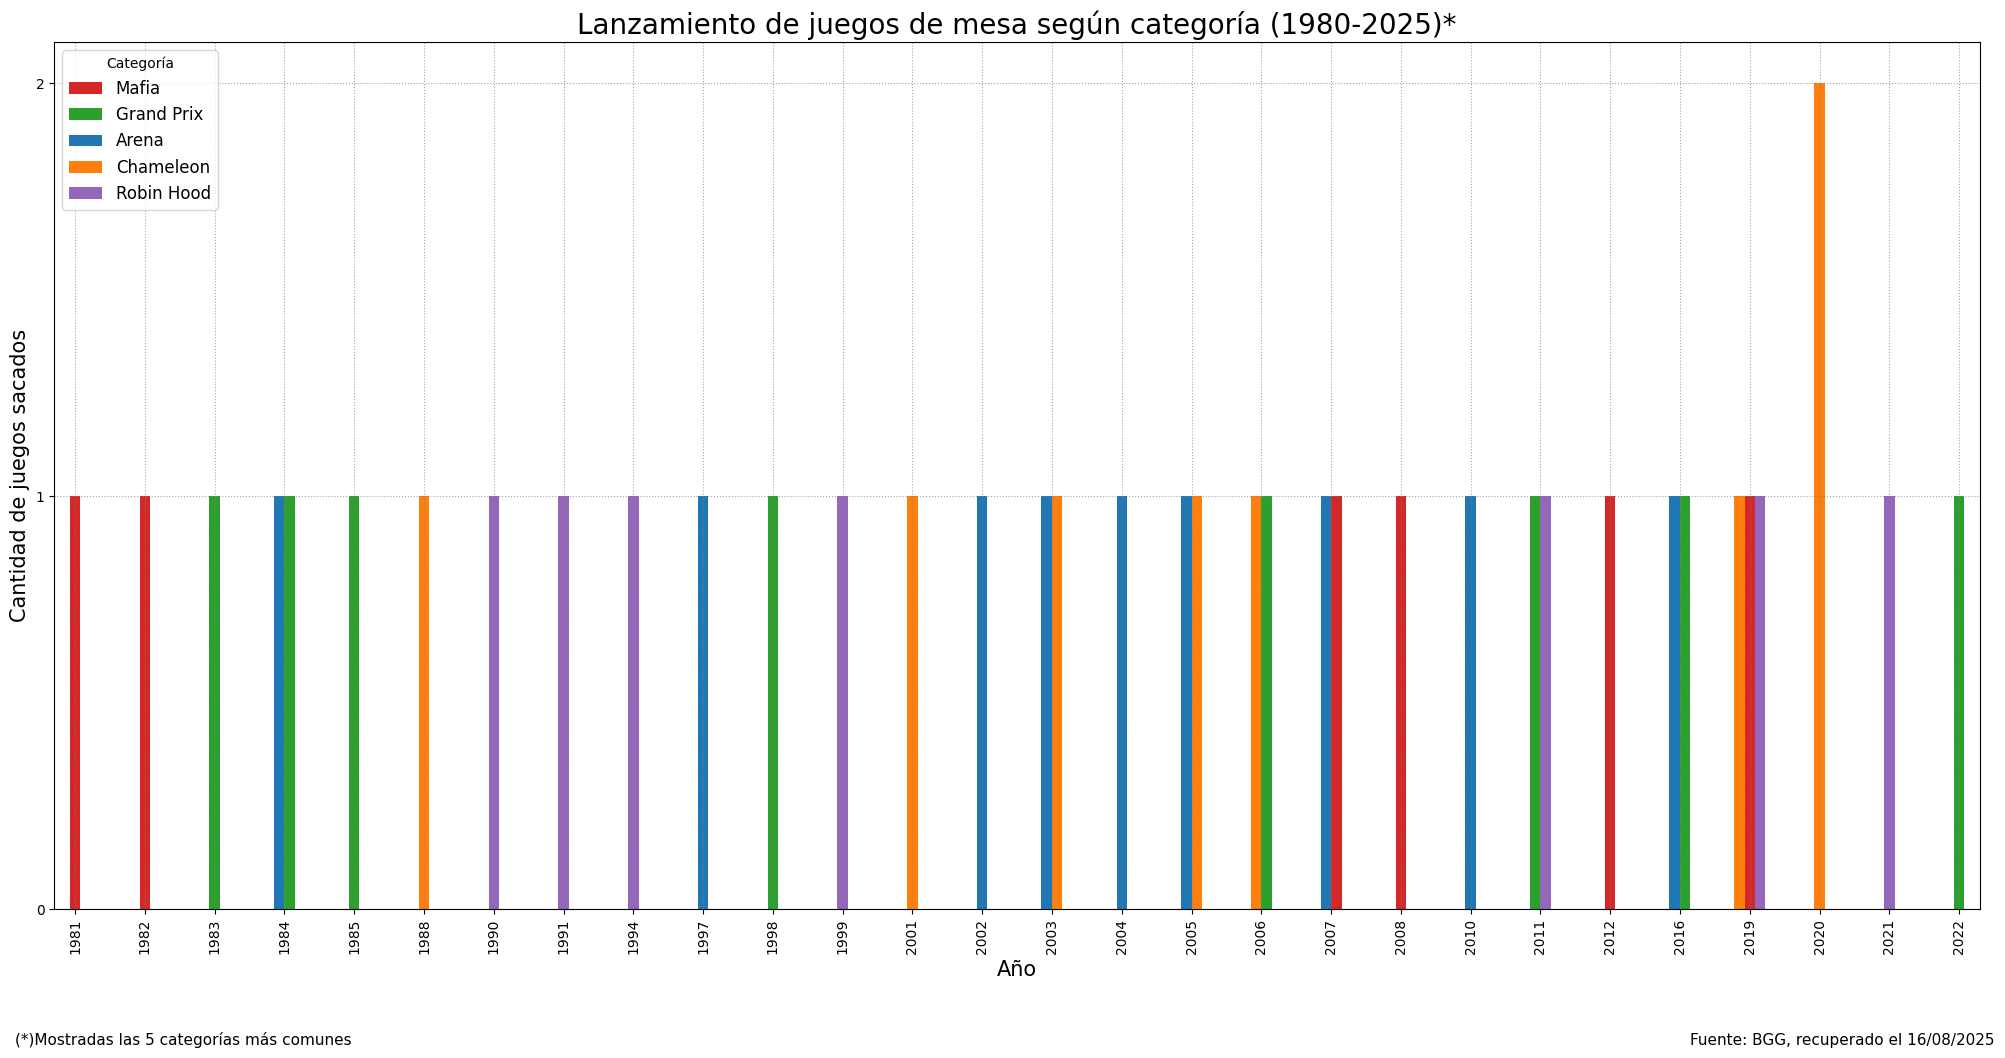

In [221]:
#Para graficar, se tomará el archivo escrito en la respuesta b), y el
# método del gráfico se basa en la estrategia de la Actividad 1

categorias_anuales = pd.read_csv("Ultimos_datos_tabla.csv")

categorias_anuales["Cantidad"] = categorias_anuales["Cantidad"].astype(int)
categorias_anuales["Año"] = categorias_anuales["Año"].astype(int)

pv = pd.pivot_table(categorias_anuales, index="Año", columns="Categoría",
                    values="Cantidad", aggfunc="sum", fill_value=0)

#Consulta a ChatGPT: Estoy graficando los datos ordenados de un dataframe Pandas con tres 
# categorías, el problema es que las barras me toman el espacio haya o no un dato, y es 
# difícil de leer el gráfico porque se alejan barras solitarias del año correspondiente. 
# ¿Existe algún método para ignorar la barra cuando la cant == 0? Intenté de forma iterativa 
# y no me dejó, este es el código que tengo hasta ahora, que sí me grafica, pero me mueve las 
# barras de un modo que no quiero: [...] Había pensado que se podía determinar quizá un área 
# para marcarla con líneas alrededor y se notara más, pero lo ideal sería que las barras, sin 
# importar la cantidad, siempre queden juntas en su año." A continuación, lo que sugirió 
# ChatGPT tendrá una marca:

fig, ax = plt.subplots(figsize=(20,10))

# ChatGPT: Reemplazar ceros por NaN para no dibujarlos
pv_masked = pv.replace(0, np.nan)

#ChatGPT (modificado levemente):
anios = pv_masked.index
width_bar = 0.15    # ancho fijo de cada barra
spacing = 0      # espacio entre barras
# Graficar año por año
for j, anio in enumerate(anios):
    vals = pv_masked.loc[anio]
    non_zero = vals[vals.notna()]
    n = len(non_zero)
    if n == 0:
        continue
    # Calcular desplazamiento centrado del grupo
    group_width = n * width_bar + (n - 1) * spacing
    start = -group_width / 2 + width_bar / 2
    offsets = [start + k*(width_bar + spacing) for k in range(n)]
    
    for k, (cat, val) in enumerate(non_zero.items()):
        ax.bar(j + offsets[k], val, width=width_bar,
               color=f"C{list(pv.columns).index(cat)}", label=cat)
#Término de bloque sugerido por ChatGPT

ax.set_xticks(range(len(anios)))
ax.set_xticklabels(anios, rotation=90)
ax.set_yticks([0, 1, 2])

#ChatGPT sugiere un cambio en mi función ax.legend (ediciones en el código proporcionado):
# Leyenda sin duplicados
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title="Categoría", fontsize=12, loc="upper left")
#Término de bloque sugerido por ChatGPT

ax.set_xlabel("Año", fontsize=15)
ax.set_ylabel("Cantidad de juegos sacados", fontsize=15)
ax.set_title("Lanzamiento de juegos de mesa según categoría (1980-2025)*", fontsize=20)

plt.figtext(0.01, -0.05, "(*)Mostradas las 5 categorías más comunes", fontsize=11, horizontalalignment="left")
plt.figtext(1.0, -0.05, "Fuente: BGG, recuperado el 16/08/2025", fontsize=11, horizontalalignment="right")
plt.grid(True, linestyle=":", color="gray", alpha=0.7)
ax.set_xlim(-0.3, len(anios)-0.7)

plt.tight_layout()
plt.show()


_Guiándonos de nuestros datos, si tomamos los periodos 1981-1989, y 2013-2022 como actualidad, la categoría de juego más popular sí ha cambiado: en los 80's, la categoría más popular fue Grand Prix, mientras que en la actualidad sería Chamaleon. Sin embargo, si nos fijamos en toda la línea de tiempo graficada, podemos notar que Arena es bastante popular durante los años, siendo un juego de su categoría de último lanzamiento dentro de la última década, y la moda del total de datos (aunque se le acercan Grand Prix y Chamaleon)._

### 3.5 Análisis Crítico (Bono +0.5 puntos)

¿Qué limitaciones o problemas encontraste en los datos?

_Uno de los problemas que logré reconocer en los datos luego de haberlos estudiado es este documento, fue la cantidad de "datos absurdos" que se pueden llegar a encontrar. Sin una limpieza por categoría, los datos no son confiables y, por ende, no utilizables. Al momento de realizar la tarea, tuve que ir filtrando poco a poco algunos datos, pero, por ejemplo, ¿qué pasa si mi respuesta de 3.2 toma en cuenta datos con max_time <= 0? ¿Cómo se puede confiar en esos datos sin una limpieza, y cómo alteran los resultados de las gráficas? Tal vez las tendencias sigan siendo las mismas, ¿pero y si no? Por ejemplo, en todos los estudios y gráficas realizadas durante la tarea, ¿habrán datos con max_player o min_player 0 personas, o incluso personas negativas? Ya viendo que no se hizo la filtración correcta en tiempo, no podemos asegurar que ningún dato sea totalmente válido sin validarlo manualmente, asegurándonos de que caiga en rangos razonables, entonces, la libertad de poner cualquier 

- Haciendolo más limitado en qué datos pueden agregarse / limpieza por categoría debido a absurdos
- Estudios cerca de 2025 -> sesgo por falta de informacion
- Pocos datos en categoria pueden caer en error